# Naive Bayes

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

## PCA Optimizer

In [2]:
def optimizer(X_train, X_test, y_train, y_test):
    best_accuracy = 0

    saved_X_train = X_train
    saved_X_test= X_test

    for i in range(99):
        
        i = (i+1)/100
        print("Variance: {}/1".format(i), end="\r")

        pca = PCA(n_components = i)
        X_train = pca.fit_transform(saved_X_train)
        X_test = pca.transform(saved_X_test)
        explained_variance = pca.explained_variance_ratio_

        gnb = GaussianNB()
        y_pred = gnb.fit(X_train, y_train).predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        if(accuracy > best_accuracy):
            best_accuracy = accuracy
            variance = i

    return variance

## Normal Data

### Load Data

In [3]:
# Load lines from mfeat-pix.txt
features = open('mfeat-pix.txt').readlines()

# Create labels for each line, 0-9 for each 200 lines
labels = []
for i in range(10):
  for j in range(200):
    labels.append(i)
labels = np.array(labels)

# Convert each line to a numpy array
for i in range(len(features)):
  features[i] = np.array(features[i].split()).astype('float')
  # Normalize
  features[i] = features[i] / 6
features = np.array(features)

### Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40, stratify=labels)

### PCA

In [5]:
variance = optimizer(X_train, X_test, y_train, y_test)

pca = PCA(n_components = variance)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


### Naïve Bayes

In [6]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

### Report

0.945
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.87      0.97      0.92        40
           2       1.00      0.95      0.97        40
           3       0.90      0.93      0.91        40
           4       1.00      0.97      0.99        40
           5       0.95      0.88      0.91        40
           6       1.00      0.95      0.97        40
           7       1.00      0.85      0.92        40
           8       0.93      1.00      0.96        40
           9       0.85      1.00      0.92        40

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.95       400
weighted avg       0.95      0.94      0.95       400



Text(0.5, 1.0, 'Normal Data')

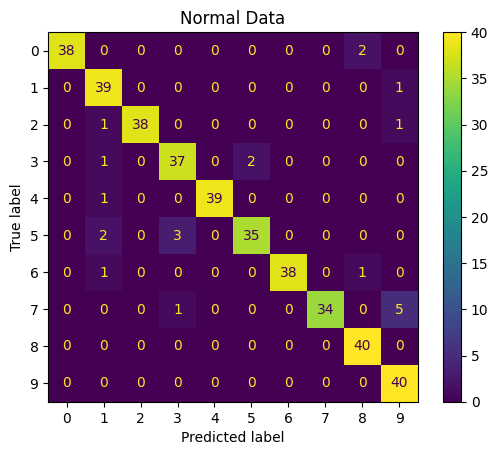

In [7]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=gnb.classes_).ax_.set_title("Normal Data")

## Augmented Data

### Load Data

In [8]:
X_train =  np.load("X_train_augmented.npy")
X_test = np.load("X_test_augmented.npy")
y_train = np.load("y_train_augmented.npy")
y_test = np.load("y_test_augmented.npy")

X_train = X_train.reshape((X_train.shape[0], 240))

### PCA

In [9]:
variance = optimizer(X_train, X_test, y_train, y_test)

pca = PCA(n_components = variance)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

### Naïve Bayes

In [10]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

### Report

0.9425
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.94      0.85      0.89        40
           2       0.97      0.97      0.97        40
           3       0.91      0.97      0.94        40
           4       0.91      0.97      0.94        40
           5       0.95      0.88      0.91        40
           6       0.97      0.93      0.95        40
           7       0.95      0.97      0.96        40
           8       0.91      0.97      0.94        40
           9       0.93      0.93      0.93        40

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



Text(0.5, 1.0, 'Augmented Data')

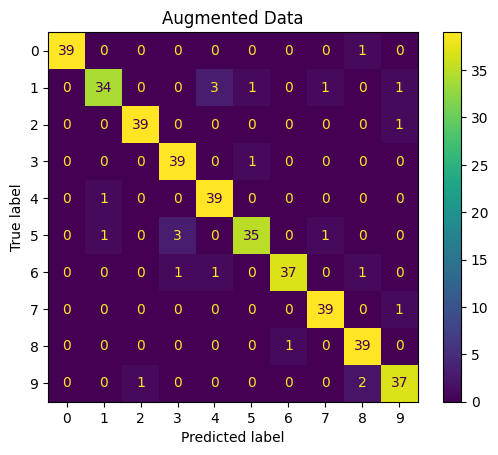

In [11]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=gnb.classes_).ax_.set_title("Augmented Data")